## Hashing: Querying in Face Datasets
### Hashing is most commonly used to implement hash tables and for data encryption. A hash table stores key/value pairs in the form of a list, while the hash function maps the elements of the dataset via a key and generates hash values. A real-world recognition system has to cope with several unseen individuals and determine whether a given face image is registered or not, and thus, certain elements in databases can be found much faster-using hashing functions and classification methods.
## Question:
### Implement a basic hashing model from scratch that hashes the images. You can use any dataset of few images and can implement a-hash or any other hashing algorithm of your choice. For a-hash, given any images, first resize the image to a suitable size, followed by grayscale conversion of the image. Then mean normalize the image to obtain a binary image, whose sum can be used as a hash value. Using the hash model, encode all the images present inside your directory and then search for images similar to the query image.

## Important libraries 

In [1]:
import numpy as np
from PIL import Image,ImageOps
import os

## Normalizing

In [2]:
def mean_normalize(arr):
    arr = np.ravel(arr)
    m = np.mean(arr)
    arr_1 = []
    for i in range(len(arr)):
        if (arr[i] >= m):
            arr_1.append(1)
        else:
            arr_1.append(0)
    res = Image.fromarray((np.array(arr_1)).astype(np.uint8))   
    return arr_1


## Creating Hash

In [3]:
def create_hash(image_file):
    hash_size=8
    image = Image.open(image_file, )
    image = image.resize((8, 8))
    image_gray = ImageOps.grayscale(image)
    image_meanNormalized = mean_normalize(image_gray)
    res = "".join([str(elem) for elem in image_meanNormalized])
    hashformat = "0{hashlength}x".format(hashlength=hash_size ** 2 // 4)
    return int(res, 2).__format__(hashformat)
  
    

## Similarly check function 

In [4]:
def check(a,b,thrs):
    a=create_hash(join("./images/", a))
    b=create_hash(join("./images/", b))
    v= sum(map(lambda x: 0 if x[0] == x[1] else 1, zip(a,b)))
    if v<=thrs:
        return True
    else:
        return False 

## Opening the directory 

In [5]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("./images/") if isfile(join("./images/", f))]

In [6]:
onlyfiles[1]

'forest3.jpg'

## Ceating Hash for the image 

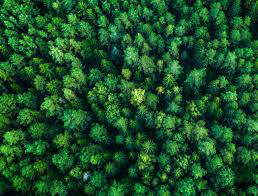

test_img4.jpg Has a Hash of:  bafded795d868204


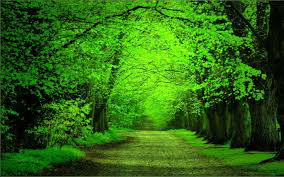

forest3.jpg Has a Hash of:  3c3e3c3e1c181c1c


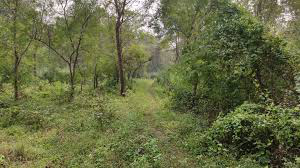

forest2.jpg Has a Hash of:  fb99f848f878f8e8


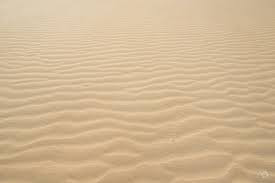

test_img5.jpg Has a Hash of:  fefefefc3c000000


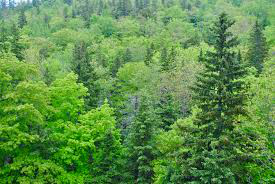

forest1.jpg Has a Hash of:  fffffcfd79210000


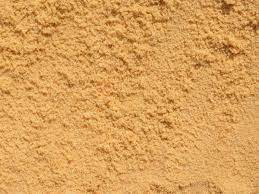

test_img6.jpg Has a Hash of:  000040ecfeffffff


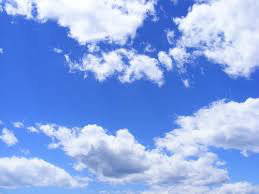

test_img2.jpg Has a Hash of:  7b3319000377feef


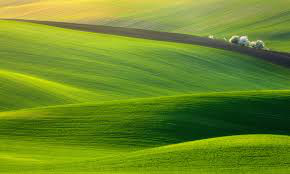

forest5.jpg Has a Hash of:  fffef8f0700000f8


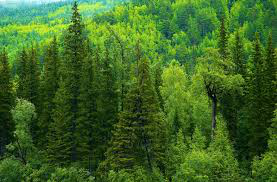

forest4.jpg Has a Hash of:  ffff9e0e04000404


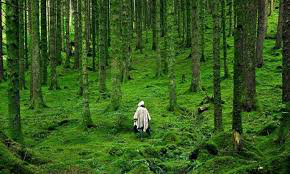

test_img3.jpg Has a Hash of:  4100183c7cfc7878


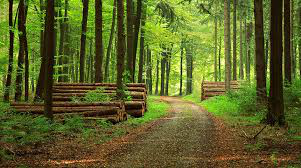

test.jpeg Has a Hash of:  ee8e0e0e0e0c0800


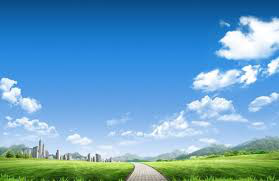

test_img1.jpg Has a Hash of:  00030387ffffff18


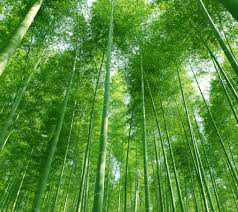

forest6.jpg Has a Hash of:  bce1d3131e1c1c2b


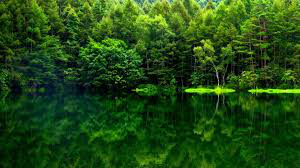

forest7.jpg Has a Hash of:  ff7f340007000008


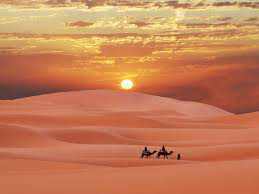

desert7.jpg Has a Hash of:  ffff3c1800000000


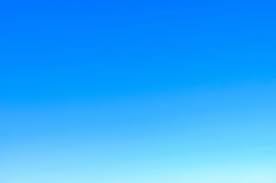

sky2.jpg Has a Hash of:  0000000007ffffff


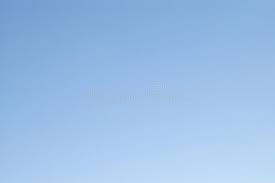

sky3.jpg Has a Hash of:  0000000f1f7fffff


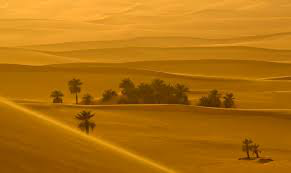

desert6.jpg Has a Hash of:  ffffff0080400000


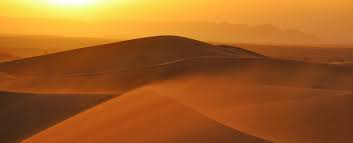

desert4.jpg Has a Hash of:  ffffe70000100000


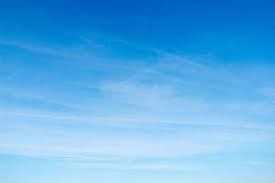

sky1.jpg Has a Hash of:  00000018ffffffff


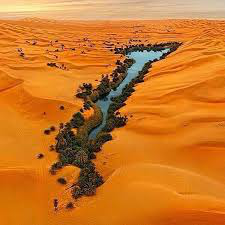

desert5.jpg Has a Hash of:  fff3e347878c0f00


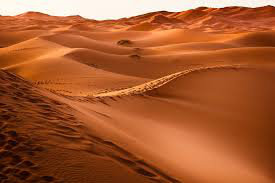

desert1.jpg Has a Hash of:  fffec470301c0e07


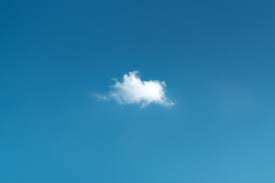

sky4.jpg Has a Hash of:  000000183f7fffff


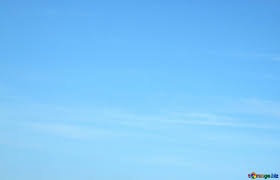

sky5.jpg Has a Hash of:  00000018ffffffff


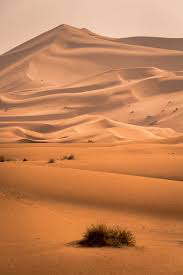

desert2.jpg Has a Hash of:  fffc763f3f002000


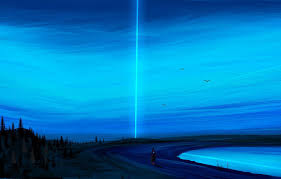

sky7.jpg Has a Hash of:  008fffffff780001


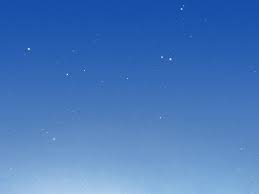

sky6.jpg Has a Hash of:  00000000ffffffff


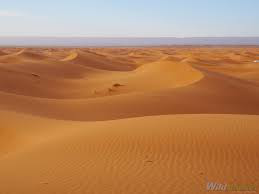

desert3.jpg Has a Hash of:  ffff000000600000


In [7]:
dic = {}
for i in onlyfiles:
    dic[i] = create_hash("images/" + i)
    im = Image.open("images/" + i)
    display(im)
    print(i,"Has a Hash of: ",dic[i])

## Testing 

image name in the image foldertest_img1.jpg


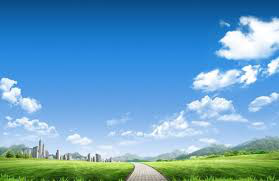

Similar  images are ['test_img6.jpg', 'test_img1.jpg', 'sky2.jpg', 'sky3.jpg', 'sky1.jpg', 'sky4.jpg', 'sky5.jpg', 'sky6.jpg']


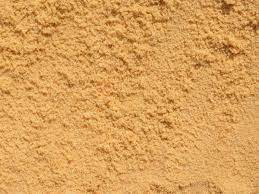

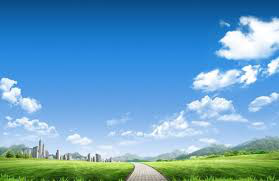

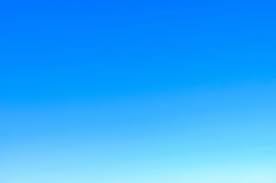

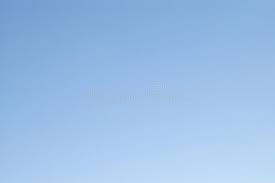

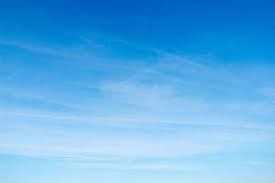

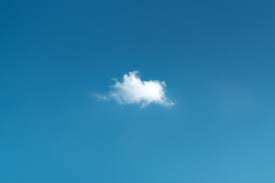

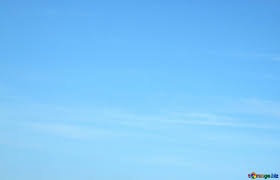

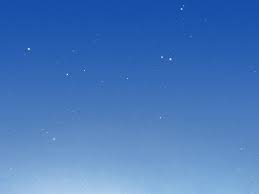

In [8]:
im_sr=str(input("image name in the image folder"))
im = Image.open("images/" + im_sr).convert('RGB')
display(im)
#im_sr='test_img1.jpg'
x=[]
for i in dic.keys():
    if check(i,im_sr,8):
        x.append(i)
print("Similar  images are",x)

for i in x:
    im = Image.open("images/" + i)
    display(im)
    